In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree

In [17]:
df = pd.read_csv("OneHot_top30mutations.csv")

In [18]:
df

,30N,32I,46I,46L,47A,47V,48A,48S,48T,48Q,...,82T,82S,84A,84C,84V,88S,88T,88G,90M,Best drug
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FPV
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,DRV
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FPV
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,DRV
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DRV
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,DRV
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DRV
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FPV
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TPV
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,DRV


In [19]:
X = df.drop(columns = ['Best drug'])

In [20]:
Y = df['Best drug']

In [21]:
X

,30N,32I,46I,46L,47A,47V,48A,48S,48T,48Q,...,82M,82T,82S,84A,84C,84V,88S,88T,88G,90M
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Y

0     FPV
1     DRV
2     FPV
3     DRV
4     DRV
5     DRV
6     DRV
7     FPV
8     TPV
9     DRV
10    TPV
11    DRV
12    TPV
13    TPV
14    DRV
15    TPV
16    FPV
17    TPV
18    FPV
19    FPV
20    DRV
21    NFV
22    IDV
23    FPV
24    SQV
25    DRV
26    TPV
27    SQV
28    IDV
29    TPV
Name: Best drug, dtype: object

In [38]:
clf = RandomForestClassifier(n_estimators = 1) 
clf.fit(X, Y)

RandomForestClassifier(n_estimators=1)

In [39]:
feature_names = ['30N','32I','46I','46L','47A','47V','48A','48S','48T','48Q','48L','48M','48V','50L','50V','54A',
                   '54T','54S','54L','54M','54V','76V','82A','82C','82F','82L','82M','82T','82S','84A',
                   '84C','84V','88S','88T','88G','90M']

In [40]:
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending = False)
feature_imp

90M    0.164750
46I    0.161510
84V    0.157930
46L    0.111465
54V    0.106915
82A    0.104830
30N    0.085987
50L    0.057325
88S    0.033364
76V    0.015924
47V    0.000000
88G    0.000000
88T    0.000000
47A    0.000000
84C    0.000000
84A    0.000000
82S    0.000000
82T    0.000000
82M    0.000000
82L    0.000000
82F    0.000000
82C    0.000000
48S    0.000000
48T    0.000000
48A    0.000000
54M    0.000000
32I    0.000000
54S    0.000000
54T    0.000000
54A    0.000000
50V    0.000000
48V    0.000000
48M    0.000000
48L    0.000000
48Q    0.000000
54L    0.000000
dtype: float64

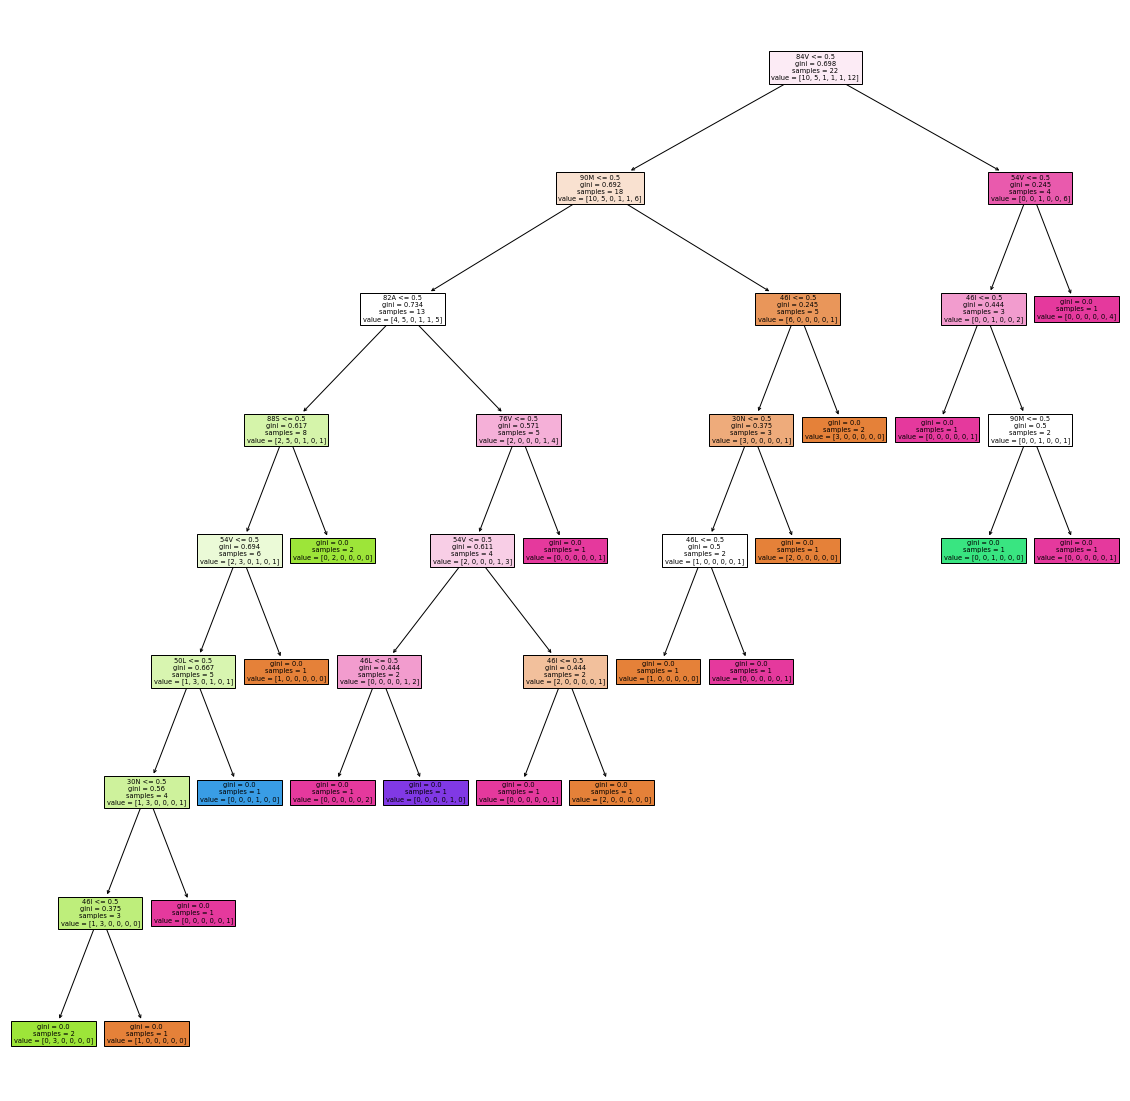

In [43]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=feature_names, filled=True)